In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import collections
import numpy as np

In [20]:
# Import network
G = nx.read_gexf('../data/processed/network/network.gexf')

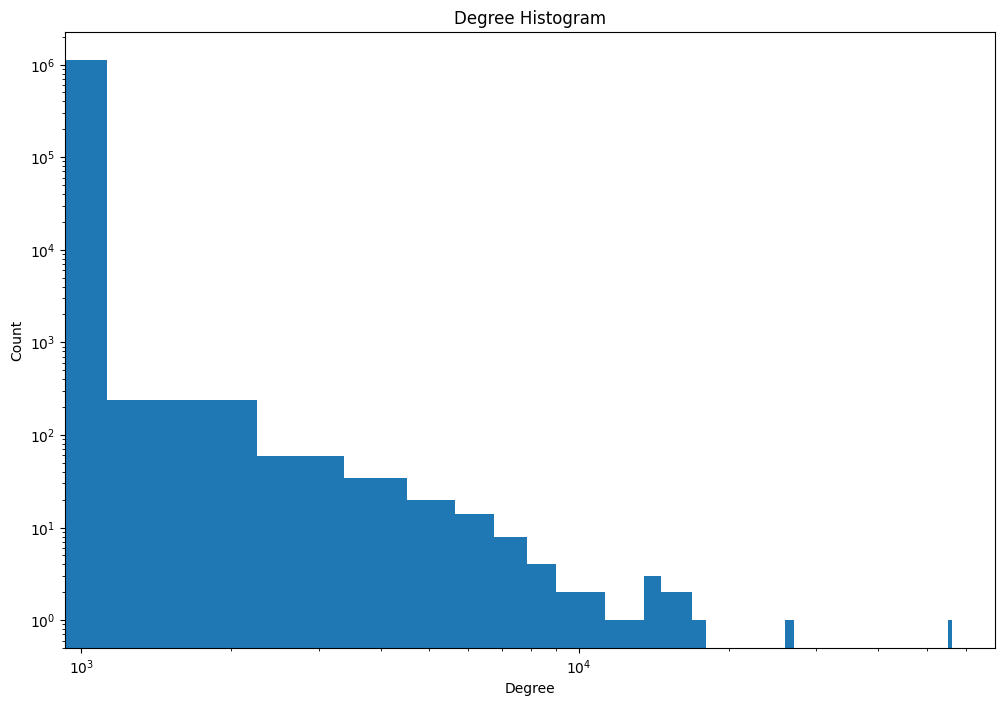

In [21]:
# Degree distribution histogram

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Plotting the degree distribution
plt.figure(figsize=(12, 8))
plt.hist(degree_sequence, bins=50)
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xscale('log')
plt.yscale('log')
plt.show()

The histogram appears to follow a power-law distribution, which is typical for social networks. This suggests a small number of nodes (users) have a high degree (many interactions), while a larger number of nodes have a lower degree (fewer interactions).

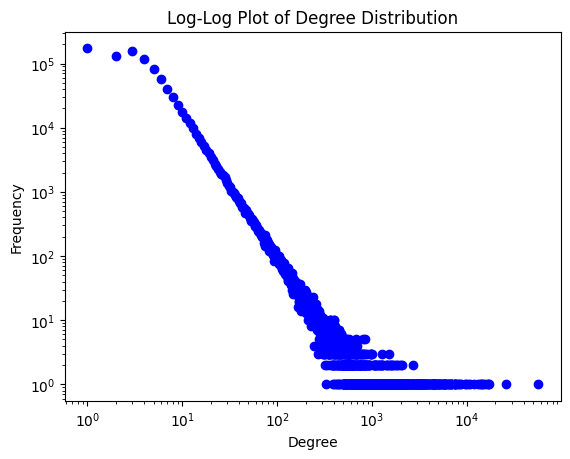

In [22]:
# Log-Log plot

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.plot(deg, cnt, 'bo')
plt.title("Log-Log Plot of Degree Distribution")
plt.ylabel("Frequency")
plt.xlabel("Degree")
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()


This log-log plot is typical of networks that follow a power-law degree distribution, which is common in real-world networks, particularly social networks. In these networks, most nodes have a relatively low degree, while a few nodes (often called "hubs") have a very high degree. This type of distribution is indicative of a scale-free network.

The plot shows:

1. **Heavy Tail**: The heavy tail on the right-hand side of the plot indicates that there are nodes with a very high degree, although they are few in number.

2. **Scale-Free Property**: The plot suggests that the network may be scale-free, meaning that the probability that a node has a large number of connections does not decay rapidly. This can have implications for the robustness of the network and how information or influence might spread.

3. **Linear Portion**: The relatively straight-line portion of the plot on a log-log scale suggests a power-law distribution. However, the deviation from a straight line at the head and tail is common, as real-world data may not perfectly follow a theoretical distribution.

4. **Cut-off in Distribution**: The bending downwards at the tail end indicates a cut-off in the distribution which may suggest that the network's growth mechanisms are not purely preferential attachment (which is one way scale-free networks can evolve).

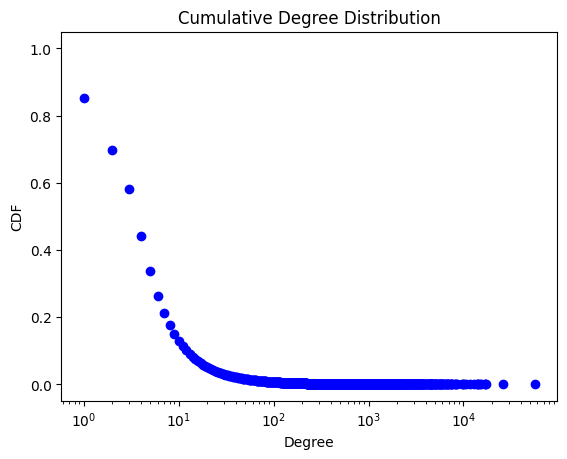

In [23]:
# Cumulative degree distribution

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

cnt_array = np.array(cnt, dtype=float)
cdf = np.cumsum(cnt_array) / sum(cnt_array)

fig, ax = plt.subplots()
plt.plot(deg, cdf, 'bo')
plt.title("Cumulative Degree Distribution")
plt.ylabel("CDF")
plt.xlabel("Degree")
ax.set_xscale('log')
# ax.set_yscale('log') # Optional: Log scale for the y-axis
plt.show()


This cumulative degree distribution (CDF) plot shows the probability that a node in the network has a degree less than or equal to a given value. In a CDF, we expect to see a monotonically increasing function, where the y-value represents the fraction of nodes with a degree less than or equal to the corresponding x-value.

From the shape of the curve one can infer the following:

1. **High-Degree Nodes**: The sharp rise at the beginning of the plot indicates that a large fraction of nodes have a low degree. This is typical of networks where many nodes have only a few connections.

2. **Tail of the Distribution**: The long tail that extends towards the right shows that there are nodes with a very high degree, although they are relatively rare. This tail represents the hubs in the network.

3. **Scale-Free Characteristics**: The fact that the tail flattens out and extends far to the right (rather than quickly reaching 1.0 and staying there) supports the idea that the network might have scale-free properties.

- Nodes with a small degree are extremely common, which is typical for most users in a social network like Stack Overflow where many users might only have a few interactions.
- The flattening of the curve indicates the presence of nodes with a high degree, although they represent a small percentage of the total number of nodes. These could be the very active users or those who provide a lot of value to the community through answers and comments.

In [24]:
# Degree Centrality

degree_centrality = nx.degree_centrality(G)
# Sort nodes by degree centrality
central_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)


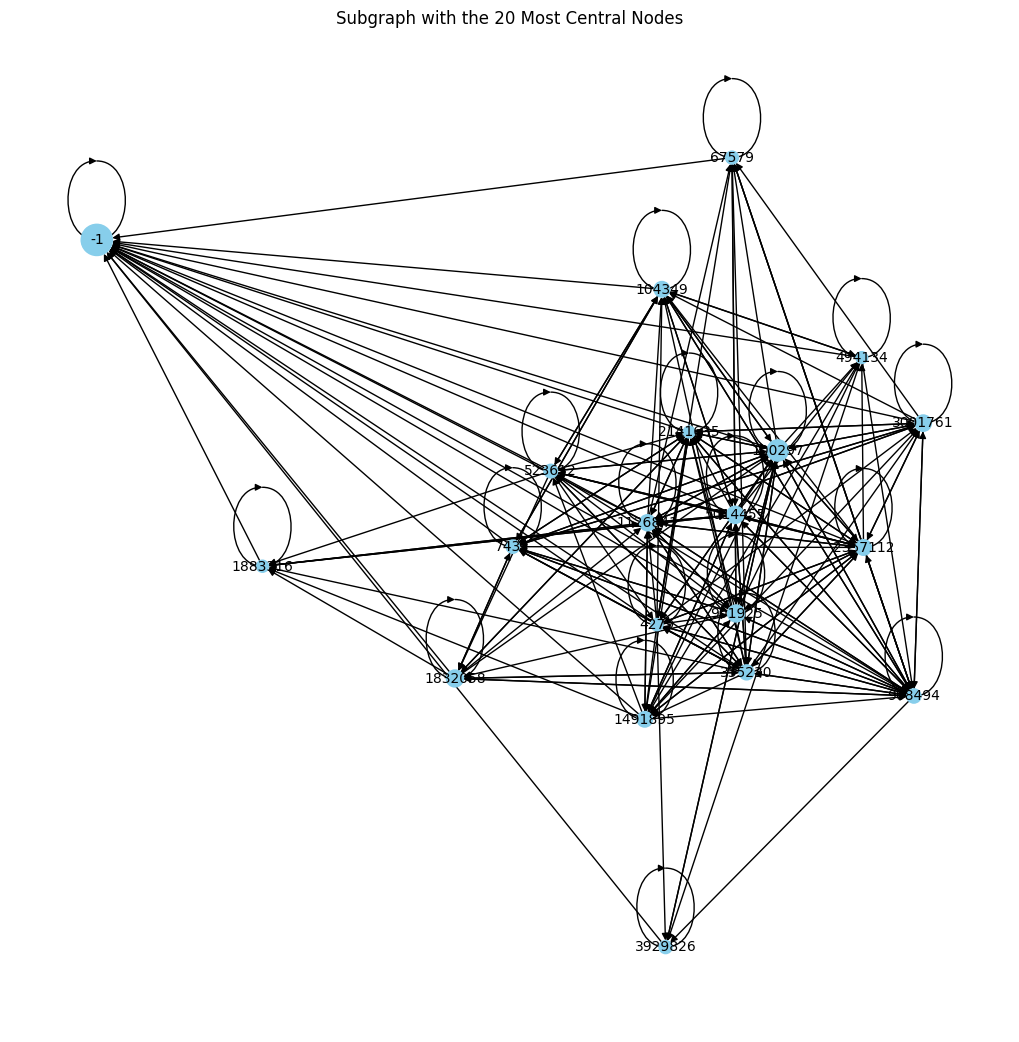

In [25]:
# Visualize the 20 most central nodes (hubs) and their edges
top_central_nodes = central_nodes[:20]

# Create a subgraph with these nodes
subgraph = G.subgraph(top_central_nodes)

# Use a layout for positioning nodes on the plot
pos = nx.spring_layout(subgraph)

# Draw the subgraph
plt.figure(figsize=(10, 10))
nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', node_size=[degree_centrality[n]*10000 for n in subgraph], edge_color='k', linewidths=1, font_size=10)

# Display the plot
plt.title("Subgraph with the 20 Most Central Nodes")
plt.show()
